In [ ]:
pip install -U klib

     |████████████████████████████████| 22.3 MB 77.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import klib

In [ ]:
races = pd.read_csv('races.csv')
drivers = pd.read_csv("drivers.csv")
results = pd.read_csv('results.csv')
qulifier = pd.read_csv("qualifying.csv")
status = pd.read_csv("status.csv")
constructor = pd.read_csv('constructors.csv')
pitstop = pd.read_csv("pit_stops.csv")
laptimes = pd.read_csv("lap_times.csv")
circuits = pd.read_csv('circuits.csv')
constructor_stand = pd.read_csv("constructor_results.csv")


In [ ]:
results.isnull().sum(axis=0)  # checking the null valuse in results data

results[results["rank"]== "\\N"] # there is null values beacause those drivers can't finish the race due to some issues.

# Replace the "\\N" by 0
d = {"\\N":0}
df = results.replace(d)

In [ ]:
# filtered the data based on the statusid who are all finished
df1=df[df['statusId']==1]
df1.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
df1['number'] = df1['number'].astype('int64')
df1['position'] = df1['position'].astype('int64')
df1['points'] = df1['points'].astype('int64')
df1['milliseconds'] = df1['milliseconds'].astype('int64')
df1['fastestLap'] = df1['fastestLap'].astype('int64')
#df['fastestLapTime'] = df['fastestLapTime'].astype('int64')
#df['fastestLapSpeed'] = df['fastestLapSpeed'].astype('int64')
df1["rank"]=df1["rank"].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
df1.drop(columns=['positionText','time'],axis=1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,10,58,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,8,58,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,6,58,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,5,58,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,4,58,5708630,43,1,1:27.418,218.385,1


In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
results.shape
klib.data_cleaning(results)

Shape of cleaned data: (24980, 18)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 2.08 MB (-60.64%)



,result_id,race_id,driver_id,constructor_id,number,grid,position,position_text,position_order,points,laps,time,milliseconds,fastest_lap,rank,fastest_lap_time,fastest_lap_speed,status_id
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24975,24981,1052,854,210,47,18,16,16,16,0.0,55,\N,\N,38,18,1:36.134,202.667,11
24976,24982,1052,842,213,10,5,17,17,17,0.0,52,\N,\N,48,5,1:34.090,207.069,31
24977,24983,1052,849,3,6,17,18,18,18,0.0,51,\N,\N,16,19,1:36.602,201.685,31
24978,24984,1052,4,214,14,9,\N,R,19,0.0,32,\N,\N,31,17,1:36.063,202.816,23


200.0

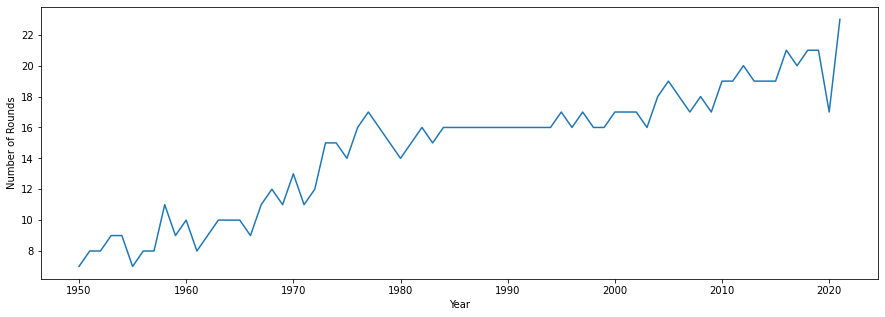

In [ ]:
rounds = races.groupby('year').round.max().reset_index()['round'].tolist()
years = races.groupby('year').round.max().reset_index()['year'].tolist()

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(years, rounds)

ax.set_ylabel("Number of Rounds")
ax.set_xlabel("Year");

r1950 = races['year'].isin([1950]).value_counts()
r2019 = races['year'].isin([2019]).value_counts()
i = (r2019 - r1950) / r1950 * 100
i[True]

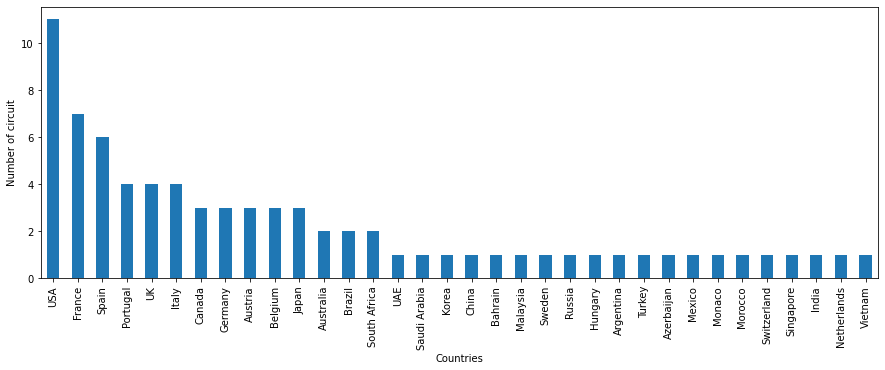

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
circuits['country'].value_counts().plot.bar(ax=ax)

ax.set_xlabel("Countries")
ax.set_ylabel("Number of circuit");

In [ ]:
driver_forename_nationality=drivers.groupby('forename').nationality.value_counts()
driver_forename_nationality

# Number of driver in f1 by each nationality
drivers_nationality = drivers['nationality'].value_counts()
fig = px.pie(drivers_nationality, values=drivers_nationality.values, names=drivers_nationality.index)
fig.show()

In [ ]:
qu=qulifier
d1=klib.data_cleaning(qu)
d1.info()
qu.info()
qu["position"].unique()

Shape of cleaned data: (8714, 9)Remaining NAs: 397

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.32 MB (-53.33%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8714 entries, 0 to 8713
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   qualify_id      8714 non-null   int16 
 1   race_id         8714 non-null   int16 
 2   driver_id       8714 non-null   int16 
 3   constructor_id  8714 non-null   int16 
 4   number          8714 non-null   int8  
 5   position        8714 non-null   int8  
 6   q1              8706 non-null   string
 7   q2              8580 non-null   string
 8   q3              8459 non-null   string
dtypes: int16(4), int8(2), string(3)
memory usage: 289.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8714 entries, 0 to 8713
Data columns (total 9

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [ ]:
# Drivers name concat
concat_driver_name = lambda x: f"{x.forename} {x.surname}" 

drivers['driver'] = drivers.apply(concat_driver_name, axis=1)
 
#Preparing F1 history victories dataset
results_copy = results.set_index('raceId').copy()
races_copy = races.set_index('raceId').copy()

results_copy = results_copy.query("position == '1'")
results_copy['position'] = 1 # casting position 1 to int

results_cols = ['driverId', 'position']
races_cols = ['date']
drivers_cols = ['driver', 'driverId']

results_copy = results_copy[results_cols]
races_copy = races_copy[races_cols]
drivers_copy = drivers[drivers_cols]

f1_victories = results_copy.join(races_copy)
f1_victories = f1_victories.merge(drivers_copy, on='driverId', how='left')

# Victories cumulative sum
f1_victories = f1_victories.sort_values(by='date')

f1_victories['victories'] = f1_victories.groupby(['driverId']).cumsum()

# Getting the top five f1 biggest winners drivers id
f1_biggest_winners = f1_victories.groupby('driverId').victories.nlargest(1).sort_values(ascending=False).head(5)
f1_biggest_winners_ids = [driver for driver, race in f1_biggest_winners.index]
# Dataset ready
f1_W = f1_victories.query(f"driverId == {f1_biggest_winners_ids}")

In [ ]:
# Dict for map drivers by id
winner_drivers_ids = f1_W[['driverId', 'driver']].drop_duplicates()
winner_drivers_map = {}

for _, row in winner_drivers_ids.iterrows():
    winner_drivers_map[row['driverId']] = row['driver']  

In [ ]:
colors = {
    'Alain Prost': '#d80005', 
    'Ayrton Senna': '#ffffff', 
    'Michael Schumacher': '#f71120',
    'Sebastian Vettel': '#10428e',
    'Lewis Hamilton': '#e6e6e6'
}

# Pole positions dataset
f1_biggest_winners_poles = results.query(f"driverId == {f1_biggest_winners_ids} & grid == 1")[['driverId', 'grid']]

# Driver name mapping
f1_biggest_winners_poles['driver'] = f1_biggest_winners_poles.driverId.map(winner_drivers_map)
f1_biggest_winners_poles['color'] = f1_biggest_winners_poles.driver.map(colors)

# Sum cumulative poles
f1_biggest_winners_poles['total_poles'] = f1_biggest_winners_poles.groupby(['driverId']).cumsum()   

# Total pole positions by winner drivers
f1_biggest_winners_total_poles = f1_biggest_winners_poles.groupby('driver').total_poles.nlargest(1).sort_values(ascending=False).head(5)
f1_biggest_winners_total_poles = pd.DataFrame(f1_biggest_winners_total_poles).reset_index()

f1_biggest_winners_total_poles['color'] = f1_biggest_winners_total_poles.driver.map(colors)


In [ ]:
# Plot pole positions
fig = px.bar(
    f1_biggest_winners_total_poles, 
    x='driver', 
    y='total_poles',
    color='driver',
    color_discrete_sequence=f1_biggest_winners_total_poles.color
)

# Bar border line color
fig.update_traces(dict(marker_line_width=1, marker_line_color="black"))

# Setting title
fig.update_layout(title_text="Pole positions between the top 5 race winners drivers")

fig.show()

In [ ]:
minimum_duration = pitstop[['raceId','driverId','duration']].copy()
minimum_duration = minimum_duration.sort_values(by='duration')
minimum_duration.head()

,raceId,driverId,duration
1037,858,813,12.897
1044,858,811,12.959
693,851,1,13.173
632,851,813,13.186
1640,870,30,13.199


In [ ]:
f1 = results.copy()
f1 = f1.merge(constructor, how='left', on='constructorId')
f1 = f1.merge(races, how='left', on='raceId')
f1 = f1.merge(circuits, how='left', on='circuitId')
f1 = f1.merge(drivers, how='left', on='driverId')
f1 = f1.merge(status, how='left', on='statusId')
f1 = f1.merge(pitstop,how='left',on=['raceId','driverId'])
f1 = f1.merge(constructor_stand,how='left',on=['raceId','constructorId'])
f1.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points_x,laps,time_x,milliseconds_x,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,name_x,nationality_x,url_x,year,round,circuitId,name_y,date,time_y,url_y,circuitRef,name,location,country,lat,lng,alt,url_x,driverRef,number_y,code,forename,surname,dob,nationality_y,url_y,driver,status_x,stop,lap,time,duration,milliseconds_y,constructorResultsId,points_y,status_y
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton,Finished,NaN,NaN,NaN,NaN,NaN,1.0,14.0,\N
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld,Finished,NaN,NaN,NaN,NaN,NaN,2.0,8.0,\N
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg,Finished,NaN,NaN,NaN,NaN,NaN,3.0,9.0,\N
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso,Finished,NaN,NaN,NaN,NaN,NaN,4.0,5.0,\N
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen,Finished,NaN,NaN,NaN,NaN,NaN,1.0,14.0,\N


In [ ]:
#replacing any empty vales with NaN
f1.replace(r'\N', np.nan, inplace=True)

In [ ]:
#Focusing the dataframe:
f1 = f1[['year', 'name', 'date', 'driverRef', 'name_x', 'grid',
       'position', 'points_x', 'laps', 'time_x',
       'milliseconds_x', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed',  'round',
        'dob', 'nationality_y', 'status_x','status_y','stop','lap','time','duration','milliseconds_y','points_y']]
f1.position = f1.position.astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
f1 = f1.rename(columns={'name_x':'constructor', 'time_x': 'time', 'nationality_y':'nationality'})
f1 = f1.sort_values('year')
f1.head()

,year,name,date,driverRef,constructor,grid,position,points_x,laps,time,milliseconds_x,fastestLap,rank,fastestLapTime,fastestLapSpeed,round,dob,nationality,status_x,status_y,stop,lap,time,duration,milliseconds_y,points_y
20034,1950,Silverstone Circuit,1950-05-13,claes,Talbot-Lago,21,11.0,0.0,64,NaN,NaN,NaN,NaN,NaN,NaN,1,1916-08-11,Belgian,+6 Laps,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20178,1950,Indianapolis Motor Speedway,1950-05-30,bettenhausen,Kurtis Kraft,9,5.0,1.0,136,NaN,NaN,NaN,NaN,NaN,NaN,3,1916-09-12,American,+2 Laps,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20177,1950,Silverstone Circuit,1950-05-13,rolt,ERA,10,NaN,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,1,1918-10-16,British,Gearbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20176,1950,Silverstone Circuit,1950-05-13,fry,Maserati,20,10.0,0.0,64,NaN,NaN,NaN,NaN,NaN,NaN,1,1915-10-26,British,+6 Laps,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20175,1950,Autodromo Nazionale di Monza,1950-09-03,bonetto,Milano,23,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7,1903-06-09,Italian,Withdrew,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
track_use = circuits[['country', 'name']].copy()
track_use = track_use.drop_duplicates(['country', 'name'])[['country', 'name']]
track_use = pd.DataFrame(track_use)
track_use = track_use.value_counts('country').reset_index()
track_use.columns = ['country', 'No of Circuits']
most_track_use = track_use.copy().head(5)
most_track_use.style.hide_index()

country,No of Circuits
USA,11
France,7
Spain,6
UK,4
Portugal,4


In [ ]:
track_use = f1[['year', 'name']].copy()
track_use = track_use.drop_duplicates(['year', 'name'])[['year', 'name']]
track_use = pd.DataFrame(track_use)
track_use = track_use.value_counts('name').reset_index()
track_use.columns = ['circuit', 'years_used']
most_track_use = track_use.copy().head()
most_track_use.style.hide_index()

circuit,years_used
Autodromo Nazionale di Monza,70
Circuit de Monaco,66
Silverstone Circuit,54
Circuit de Spa-Francorchamps,53
Nürburgring,41


In [ ]:
fastest_lap = f1[['name', 'fastestLapTime', 'driverRef']].copy()
fastest_lap = fastest_lap.sort_values(by='fastestLapTime')
fastest_lap = fastest_lap.drop_duplicates(['name'])[['name', 'fastestLapTime', 'driverRef']].head(5)
fastest_lap

,name,fastestLapTime,driverRef
29045,Bahrain International Circuit,0:55.404,russell
28527,Red Bull Ring,1:05.619,sainz
1675,Indianapolis Motor Speedway,1:10.399,barrichello
27770,Autódromo José Carlos Pace,1:10.540,bottas
28006,Circuit Gilles Villeneuve,1:13.078,bottas


In [ ]:
minimum_duration = f1[['name', 'milliseconds_y', 'driverRef','constructor']].copy()
minimum_duration = minimum_duration.sort_values(by='milliseconds_y')
minimum_duration = minimum_duration.drop_duplicates(['name'])[['name', 'milliseconds_y', 'driverRef','constructor',]].head(5)
minimum_duration['milliseconds_y'] = minimum_duration['milliseconds_y']/100

In [ ]:
minimum_duration.head()

,name,milliseconds_y,driverRef,constructor
21838,Yas Marina Circuit,128.97,maldonado,Williams
21408,Hungaroring,131.73,hamilton,McLaren
22206,Circuit de Barcelona-Catalunya,132.59,massa,Ferrari
20924,Shanghai International Circuit,139.00,perez,Sauber
21523,Circuit de Spa-Francorchamps,139.14,glock,Virgin


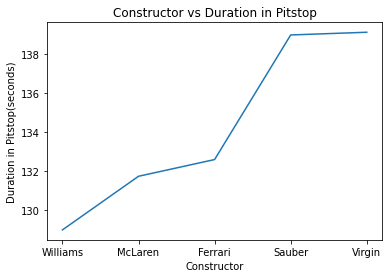

In [ ]:
plt.plot(minimum_duration['constructor'],minimum_duration['milliseconds_y'])
plt.title('Constructor vs Duration in Pitstop')
plt.xlabel('Constructor')
plt.ylabel('Duration in Pitstop(seconds)')
plt.show()

In [ ]:
team_points = f1[['points_y', 'constructor']].copy()
team_points = team_points.sort_values(by='points_y',ascending=False)
team_points = team_points.drop_duplicates(['constructor'])[['points_y', 'constructor']].head(5)
team_points

,points_y,constructor
24670,66.0,Williams
24666,50.0,Mercedes
21484,43.0,Red Bull
20321,43.0,Ferrari
20489,43.0,McLaren


In [ ]:
drivers = f1[['points_x', 'driverRef']].copy()
drivers = drivers.sort_values(by='points_x',ascending=False)
drivers = drivers.drop_duplicates(['driverRef'])[['points_x', 'driverRef']].head(5)
drivers

,points_x,driverRef
24665,50.0,hamilton
24667,36.0,massa
24669,30.0,bottas
28048,26.0,max_verstappen
21101,25.0,vettel
